# Task 

### Importing modules

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

### Importing Data

In [2]:
data_path = r'C:\Users\gerar\CareerFoundry Python\Instacart Basket Analysis'
df_orders_products_all = pd.read_pickle(os.path.join(data_path, '02 Data', 'Prepared Data', 'orders_products_all.pkl'))

In [3]:
# shape
df_orders_products_all.shape

(32404859, 33)

In [4]:
# Display all columns in a dataframe
pd.options.display.max_columns = None

In [5]:
df_orders_products_all.head(1)

,user_id,first_name,last_name,gender,state,age,date_joined,number_of_dependants,marital_status,income,product_id,product_name,aisle_id,department_id,prices,order_id,customer_order_count,order_day_of_the_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,price_range_loc,busiest_day,busiest_days_new,busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,median_prior_days,frequency_flag,_merge
0,1,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,196,Soda,77,7,9.0,2539329,1,2,8,NaN,1,0,Mid_range_price,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,both


### 2. Create visualizations with a sample subset

In [6]:
# create a bar chart, a histogram, a scatterplot from the full dataset
# create a line chart from a subset

In [7]:
# create a subset 
df_subset = df_orders_products_all[:2000000]

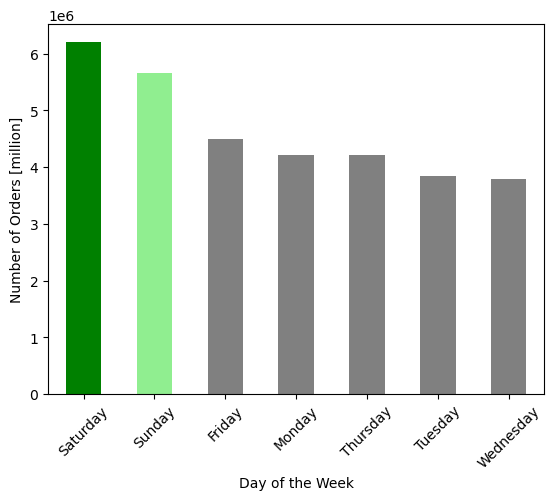

In [28]:
# create a bar chart and store it in bar 
bar_task49 = df_orders_products_all['order_day_of_the_week'].value_counts().plot.bar(color= ['green', 'lightgreen', 'gray', 'gray', 'gray', 'gray', 'gray'])

# set x axis values labels
bar_task49.set_xticklabels(['Saturday', 'Sunday', 'Friday', 'Monday', 'Thursday', 'Tuesday', 'Wednesday'], rotation=45)

# set axis labels and title
bar_task49.set_xlabel('Day of the Week')
bar_task49.set_ylabel('Number of Orders [million]')

plt.show()

Text(0, 0.5, 'Frequency of Price')

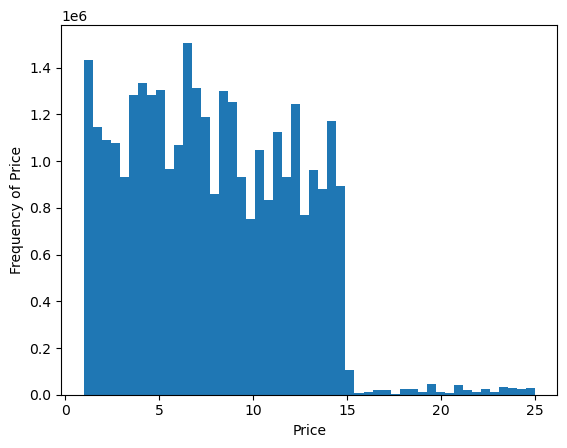

In [13]:
hist_task49 = df_orders_products_all['prices'].plot.hist(bins=50)

# set axis labels and title
hist_task49.set_xlabel('Price')
hist_task49.set_ylabel('Frequency of Price')

In [11]:
# turn outlier price values as nan
df_orders_products_all.loc[df_orders_products_all['prices']>100, 'prices'] = np.nan

In [12]:
# check: no more outliers
df_orders_products_all['prices'].max()

25.0

### Histogram: Prices (without outliers)

C:\Users\gerar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


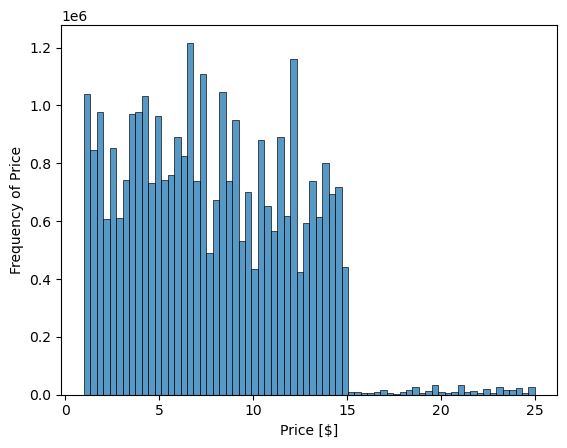

In [15]:
hist_task49 = sns.histplot(df_orders_products_all["prices"], bins=70, kde=False)
# hist_task49 = df_orders_products_all['prices'].plot.hist(bins=70)

hist_task49.set_xlabel('Price [$]')
hist_task49.set_ylabel('Frequency of Price')

plt.show()



### Scatterplot: "Prices" (without outliers)

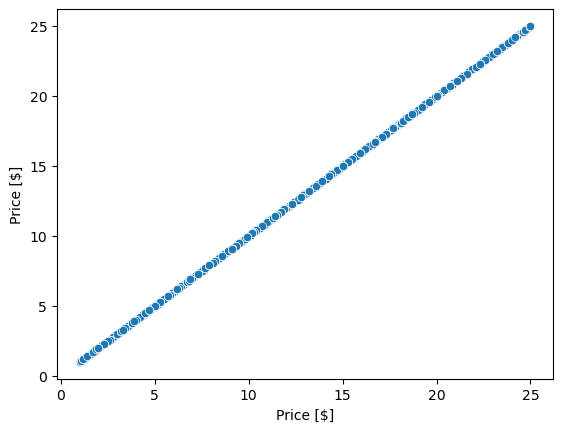

In [17]:
scatter_task49 = sns.scatterplot(x='prices', y='prices', data = df_orders_products_all)

scatter_task49.set_xlabel('Price [$]')
scatter_task49.set_ylabel('Price [$]')

plt.show()

### Line chart: Day of the week and prices (made with a subset) 

In [18]:
# create samples with random float numbers using np.random.seed(4)
np.random.seed(4)
dev = np.random.rand(len(df_orders_products_all)) <= 0.7

In [19]:
# create a big sample of the original dataframe
big = df_orders_products_all[dev]

In [20]:
# create a small sample from the dataframe. It is the remaining part. 
small = df_orders_products_all[~dev]

In [21]:
# Check that sum of samples equal to full dataframe
len(df_orders_products_all) == len(big) + len(small)

True

In [22]:
df_price_order_line = small[['order_day_of_the_week', 'prices']]

C:\Users\gerar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gerar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gerar\AppData\Local\Temp\ipykernel_12744\2591475805.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  line_task49.set_xticklabels(['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'], rotation=45)


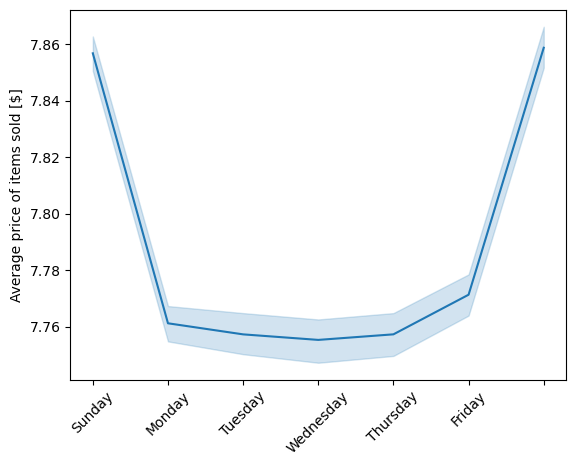

In [29]:
line_task49 = sns.lineplot(data = df_price_order_line, x='order_day_of_the_week', y='prices')

# set x axis values labels
line_task49.set_xticklabels(['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'], rotation=45)

line_task49.set_xlabel('')
line_task49.set_ylabel('Average price of items sold [$]')
plt.show()

### 3. Histogram: Order hour of  day 

In [24]:
df_orders_products_all.head(1)

,user_id,first_name,last_name,gender,state,age,date_joined,number_of_dependants,marital_status,income,product_id,product_name,aisle_id,department_id,prices,order_id,customer_order_count,order_day_of_the_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,price_range_loc,busiest_day,busiest_days_new,busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,median_prior_days,frequency_flag,_merge
0,1,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,196,Soda,77,7,9.0,2539329,1,2,8,NaN,1,0,Mid_range_price,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,both


C:\Users\gerar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


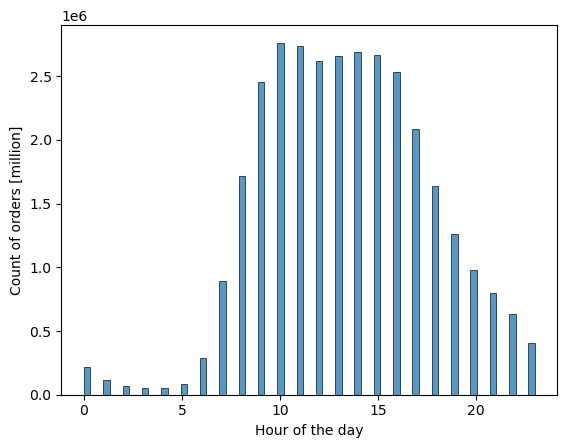

In [30]:
hist_order_hour_task49 = sns.histplot(df_orders_products_all["order_hour_of_day"], bins=70, kde=False)
# hist_order_hour_task49 = df_orders_products_all['order_hour_of_day'].plot.hist(bins=70)

hist_order_hour_task49.set_xlabel('Hour of the day')
hist_order_hour_task49.set_ylabel('Count of orders [million]')
plt.show()

### Comment
This histogram shows that most of the sales are made a timeframe between 9am to 16pm

From 0 to 5am we have the lowest sales overall.

This chart is in a scale of 1*10e6. This means that a value of 1.0 is equivalent to 1 million. 

The highest sales hour happens at 10 am and it has around 2.7 million sales. 

The lowest sales hour happens at 3am and it has around 0.1 million sales. 

### Conclusion: 
Sales are cyclical depending on the hour. They are higher in the day and lower in the night. 

### 4. Bar chart: loyalty_flag

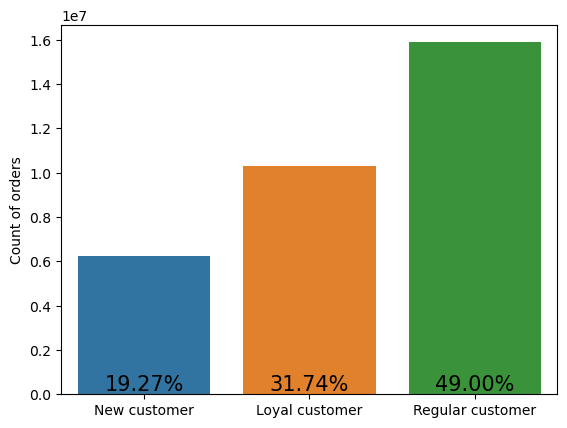

In [59]:
bar_loyalty_task49 = sns.countplot(data = df_orders_products_all, x='loyalty_flag')
#bar_loyalty_task49 = df_orders_products_all['loyalty_flag'].value_counts().plot.bar()


# Percentages
percentages_loyal_orders = (df_orders_products_all['loyalty_flag'].value_counts()/len(df_orders_products_all))*100
percentages_loyal_orders = percentages_loyal_orders[::-1]

for i, value in enumerate(percentages_loyal_orders):
    bar_loyalty_task49.text(i, value - 15, f'{value:.2f}%', ha='center', va='bottom', fontsize=15)
    
    
    
# Set labels    
bar_loyalty_task49.set_xlabel('')
bar_loyalty_task49.set_ylabel('Count of orders')
plt.show()

The loyalty attribute represents customers that have already ordered more than 40 items. New customers on the other hand have ordered less than 10 items. 

This chart represents that most of the orders have been made by customers that are neither new customers nor loyal customers. 

The scale of the chart is 1 x 10 e7 this means that 1.0 in the axis is equivalent to 10 million. |

In [35]:
# Calculating percentage of each bar 
(df_orders_products_all['loyalty_flag'].value_counts()/len(df_orders_products_all))*100

loyalty_flag
Regular customer    48.995047
Loyal customer      31.736268
New customer        19.268684
Name: count, dtype: float64


### 5. Line Chart: Expenditure in relationship to hour of the day 

C:\Users\gerar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gerar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


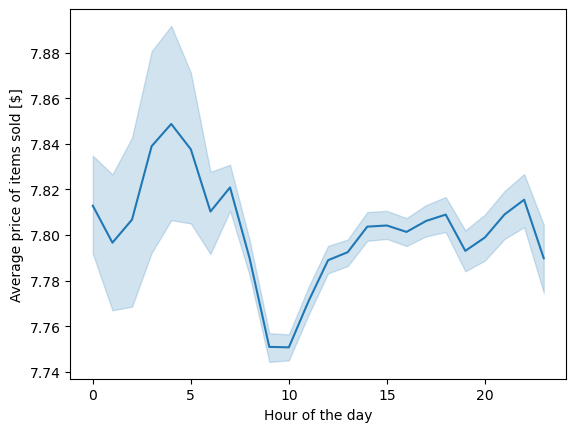

In [50]:
# create a dataframe with only those columns
df_price_per_hour = big[['prices','order_hour_of_day']]

line_price_hour_task49 = sns.lineplot(data = df_price_per_hour, x='order_hour_of_day', y='prices')

line_price_hour_task49.set_xlabel('Hour of the day')
line_price_hour_task49.set_ylabel('Average price of items sold [$]')
plt.show()

This chart shows that late night (0-5am) shopping has a higher price involved. Additionally, the lowest prices happen just before 10am. The rest of the day has a more regular price pattern.

This could be related to alcohol or party items where customers buy these items without much concern of the price. I can't explain the reason of the 10 am dip. 

### 6.  Line Chart: Age and Marital Status

C:\Users\gerar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gerar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


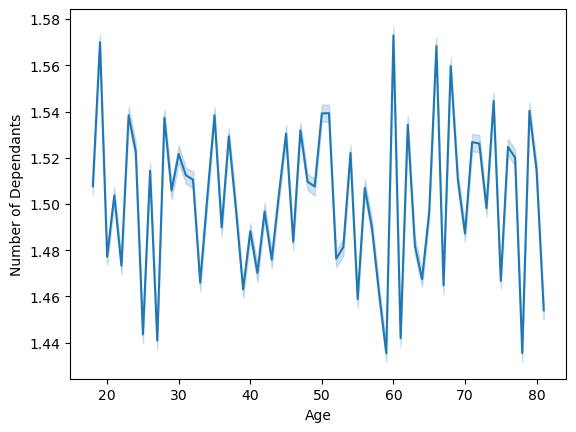

In [52]:
df_age_number_of_dependants = big[['age', 'number_of_dependants']]
line_age_number_of_dependants_task49 = sns.lineplot(data = df_age_number_of_dependants, x='age', y='number_of_dependants')

line_age_number_of_dependants_task49.set_xlabel('Age')
line_age_number_of_dependants_task49.set_ylabel('Number of Dependants')
plt.show()

In [43]:
# show values for marital status
df_age_number_of_dependants['number_of_dependants'].value_counts()

number_of_dependants
3    5694025
0    5668337
2    5664449
1    5656950
Name: count, dtype: int64

This chart shows the relationship between age and number of dependants. There is not a very clear trend. We can see that the average values per age are between 1.44 and 1.58 dependants. Whether this number grows or decreases with age is uncertain since it zig zags. It is safe to assume that in average most people have at least 1 dependant. This makes the average per age be between the before mentioned range. 

### 7. Scatterplot: Age and income

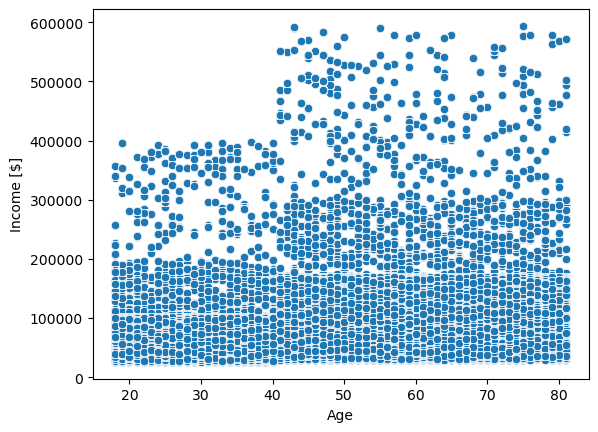

In [53]:
scatter_age_income_task49 = sns.scatterplot(x='age', y='income', data = df_orders_products_all)

scatter_age_income_task49.set_xlabel('Age')
scatter_age_income_task49.set_ylabel('Income [$]')
plt.show()

While the relationship between age and spending power isn't strictly linear. It does show that all the people that earn above 400000 are older than 40 years old. 


Between the ages of 0-40 years, most of the customers have their income "capped" at around 200,000. It is only after 40 years that we see a new portion of the customers be common between 200,000 and 300,000. 

### 8. Exporting Visualizations

In [60]:
# bar_task49
bar_task49.figure.savefig(os.path.join(data_path, '04 Analysis', 'Visualizations', 'task_49_bar.png'), bbox_inches='tight', 
    pad_inches=0.1)

# hist_task49
hist_task49.figure.savefig(os.path.join(data_path, '04 Analysis', 'Visualizations', 'task_49_hist.png'), bbox_inches='tight', 
    pad_inches=0.1)

# scatter_task49
scatter_task49.figure.savefig(os.path.join(data_path, '04 Analysis', 'Visualizations', 'task_49_scatter.png'), bbox_inches='tight', 
    pad_inches=0.1)

# line_task49
line_task49.figure.savefig(os.path.join(data_path, '04 Analysis', 'Visualizations', 'task_49_line.png'), bbox_inches='tight', 
    pad_inches=0.1)

# hist_order_hour_task49
hist_order_hour_task49.figure.savefig(os.path.join(data_path, '04 Analysis', 'Visualizations', 'task_49_hist_order_hour.png'), bbox_inches='tight', 
    pad_inches=0.1)

# bar_loyalty_task49
bar_loyalty_task49.figure.savefig(os.path.join(data_path, '04 Analysis', 'Visualizations', 'task_49_bar_loyalty.png'), bbox_inches='tight', 
    pad_inches=0.1)

#line_price_hour_task49
line_price_hour_task49.figure.savefig(os.path.join(data_path, '04 Analysis', 'Visualizations', 'task_49_line_price_hour.png'), bbox_inches='tight', 
    pad_inches=0.1)

#line_age_number_of_dependants_task49
line_age_number_of_dependants_task49.figure.savefig(os.path.join(data_path, '04 Analysis', 'Visualizations', 'task_49_line_age_dependants.png'), bbox_inches='tight', 
    pad_inches=0.1)

#scatter_age_income_task49
scatter_age_income_task49.figure.savefig(os.path.join(data_path, '04 Analysis', 'Visualizations', 'task_49_scatter_age_income.png'), bbox_inches='tight', 
    pad_inches=0.1)



### Export data

In [55]:
df_orders_products_all.to_pickle(os.path.join(data_path, '02 Data', 'Prepared Data', 'orders_products_all.pkl'))